# End-to-end Multil-class e-commerce  Classification
* This notebook builds an end-to-end multi-class image classifierdeep learning based image classifier using TensorFlow(2.2.0) and keras.

## 1.Problem
* To classify whether images contain either a saree or a shirt or t-shirt.

## 2.Data
* The data we're using is from amazon website where scrap the images of saree,shirt and t-shirts.

* https://www.amazon.in/ref=nav_logo

## 3.Evaluation
* The evaluation is a file with prediction probabilities for each Saree,shirt and t-shirt of each test image.

## 4.Features
Some information about the data:

* We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
* Predict the image is saree,shirt or t-shirt (0 = saree,2=shirt,1=t-shirt)
* There are around 240 images in the training set.
* There are around 60 images in the test set (these images have no labels, because we'll want to predict them).




## Import Packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
import os
from os import listdir
import shutil
import cv2
import random
import scipy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from matplotlib.image import imread
from keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import random



## Explore the Data


In [2]:
#Lets create a make_dir function which automatically create the test,train and augmented datesets and their labels folder Saree,shirts
and Tshirts inot them.
def make_dir(directory):
        if os.path.exists(directory):
            shutil.rmtree(directory)
        os.makedirs(directory)

make_dir(saree_dir_train)
make_dir(shirt_dir_train)
make_dir(t_shirt_dir_train)

make_dir(saree_dir_test)
make_dir(shirt_dir_test)
make_dir(t_shirt_dir_test)

make_dir(saree_dir_aug)
make_dir(shirt_dir_aug)
make_dir(t_shirt_dir_aug)

#lets define the paths labels(Sarees,shirts,Tshirts) of test and train datasets

#Train
saree_dir_train = "./clothes/train/Saree"
shirt_dir_train = "./clothes/train/shirts"
t_shirt_dir_train = "./clothes/train/Tshirts"

#Test
saree_dir_test = "./clothes/test/Saree"
shirt_dir_test = "./clothes/test/shirts"
t_shirt_dir_test = "./clothes/test/Tshirts"


'\ndef make_dir(directory):\n        if os.path.exists(directory):\n            shutil.rmtree(directory)\n        os.makedirs(directory)\n\nmake_dir(saree_dir_train)\nmake_dir(shirt_dir_train)\nmake_dir(t_shirt_dir_train)\n\nmake_dir(saree_dir_test)\nmake_dir(shirt_dir_test)\nmake_dir(t_shirt_dir_test)\n\nmake_dir(saree_dir_aug)\nmake_dir(shirt_dir_aug)\nmake_dir(t_shirt_dir_aug)\n'

In [3]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
my_data_dir = './clothes'
os.listdir(my_data_dir) 


['test', 'train']

In [4]:
# Get filenames in list
Dir=['\\test\\','\\train\\']
for i,dir1 in enumerate(Dir):
    path = my_data_dir+dir1
    p=os.listdir(path)
    print(i,p)



0 ['Saree', 'shirts', 'Tshirts']
1 ['Saree', 'shirts', 'Tshirts']


### Lets see sample image


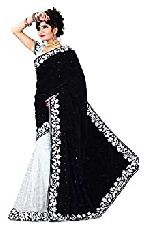

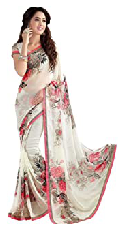

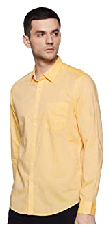

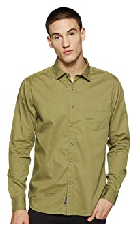

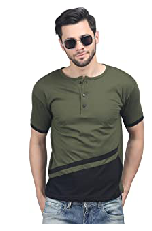

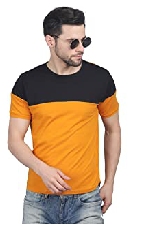

In [5]:
#lets see first two images of each  saree_dir_train, shirt_dir_train, t_shirt_dir_train dataset
Dir=[saree_dir_train, shirt_dir_train, t_shirt_dir_train]

import matplotlib.image as mpimg
for di in Dir:
    k=listdir(di)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(di,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

## Let's check how many images there are in test and train datasets


In [6]:
print("no of images of saree in train dataset ",len(os.listdir(saree_dir_train)))
print("no of images of shirts in train dataset ",len(os.listdir(shirt_dir_train)))
print("no of images of t-shirts in train dataset ",len(os.listdir(t_shirt_dir_train)))

print("no of images of saree in test dataset ",len(os.listdir(saree_dir_test)))
print("no of images of shirts in test dataset ",len(os.listdir(shirt_dir_test)))
print("no of images of t-shirts in test dataset ",len(os.listdir(t_shirt_dir_test)))



no of images of saree in train dataset  80
no of images of shirts in train dataset  80
no of images of t-shirts in train dataset  80
no of images of saree in test dataset  20
no of images of shirts in test dataset  20
no of images of t-shirts in test dataset  20


##  Training our model


In [7]:
input_shape=(128,128,3)
img_width=128
img_height=128

batch_size=12
epoch=100

train_data_dir='./clothes/train'
validation_data_dir='./clothes/test'

nb_train_samples=80
nb_validation_samples=20

model=Sequential()

# This is the first convolution

model.add(Conv2D(32,(3,3),padding='same',input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the Second convolution

model.add(Conv2D(32,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the third convolution

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# This is the fourth convolution

model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Flatten the results to feed into a DNN


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
print(model.summary())


model.compile(loss='categorical_crossentropy',optimizer = RMSprop(lr = 0.001),metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 128, 128, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0

## Data Augmentation

In [8]:
# Creating our data generator for our training data
train_generator_augmented=ImageDataGenerator(
                               rotation_range=30, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 5%
                               height_shift_range=0.10, # Shift the pic height by a max of 5%
                               rescale=1./255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                            )

## Data Preprocessing


In [9]:
# Validation
Data_gen=ImageDataGenerator(
    # used to rescale the pixel values from [0, 255] to [0, 1] interval
    rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=32, 
                                                  class_mode='categorical',
                                                 shuffle=False)

# Training

train_generator=train_generator_augmented.flow_from_directory(train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')



Found 60 images belonging to 3 classes.
Found 240 images belonging to 3 classes.


In [10]:
# checking class indices
train_generator.class_indices

{'Saree': 0, 'Tshirts': 1, 'shirts': 2}

## EarlyStopping and ModelCheckpoint

In [11]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

## Training

In [12]:
history = model.fit(
    train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[es, mc]
  
)

Epoch 1/100
6/6 [==============================] - ETA: 0s - loss: 1.4505 - accuracy: 0.2639
Epoch 00001: val_accuracy improved from -inf to 0.59375, saving model to best_model.h5
6/6 [==============================] - 1s 225ms/step - loss: 1.4505 - accuracy: 0.2639 - val_loss: 1.0976 - val_accuracy: 0.5938
Epoch 2/100
6/6 [==============================] - ETA: 0s - loss: 1.0764 - accuracy: 0.4306
Epoch 00002: val_accuracy improved from 0.59375 to 0.62500, saving model to best_model.h5
6/6 [==============================] - 1s 183ms/step - loss: 1.0764 - accuracy: 0.4306 - val_loss: 1.0562 - val_accuracy: 0.6250
Epoch 3/100
6/6 [==============================] - ETA: 0s - loss: 1.0919 - accuracy: 0.3611
Epoch 00003: val_accuracy did not improve from 0.62500
6/6 [==============================] - 1s 176ms/step - loss: 1.0919 - accuracy: 0.3611 - val_loss: 1.0942 - val_accuracy: 0.3750
Epoch 4/100
6/6 [==============================] - ETA: 0s - loss: 1.1134 - accuracy: 0.2778
Epoch 000

Epoch 30/100
6/6 [==============================] - ETA: 0s - loss: 0.6927 - accuracy: 0.6944
Epoch 00030: val_accuracy did not improve from 0.90625
6/6 [==============================] - 1s 181ms/step - loss: 0.6927 - accuracy: 0.6944 - val_loss: 0.4496 - val_accuracy: 0.8125
Epoch 31/100
6/6 [==============================] - ETA: 0s - loss: 0.7607 - accuracy: 0.6944
Epoch 00031: val_accuracy did not improve from 0.90625
6/6 [==============================] - 1s 174ms/step - loss: 0.7607 - accuracy: 0.6944 - val_loss: 0.4356 - val_accuracy: 0.8125
Epoch 32/100
6/6 [==============================] - ETA: 0s - loss: 0.6317 - accuracy: 0.7222
Epoch 00032: val_accuracy did not improve from 0.90625
6/6 [==============================] - 1s 184ms/step - loss: 0.6317 - accuracy: 0.7222 - val_loss: 0.4483 - val_accuracy: 0.7812
Epoch 33/100
6/6 [==============================] - ETA: 0s - loss: 0.8278 - accuracy: 0.6528
Epoch 00033: val_accuracy did not improve from 0.90625
6/6 [============

Epoch 60/100
6/6 [==============================] - ETA: 0s - loss: 0.6621 - accuracy: 0.7500
Epoch 00060: val_accuracy did not improve from 0.93750
6/6 [==============================] - 1s 180ms/step - loss: 0.6621 - accuracy: 0.7500 - val_loss: 0.3479 - val_accuracy: 0.8750
Epoch 61/100
6/6 [==============================] - ETA: 0s - loss: 0.7316 - accuracy: 0.6944
Epoch 00061: val_accuracy did not improve from 0.93750
6/6 [==============================] - 1s 189ms/step - loss: 0.7316 - accuracy: 0.6944 - val_loss: 0.4166 - val_accuracy: 0.8750
Epoch 62/100
6/6 [==============================] - ETA: 0s - loss: 0.4872 - accuracy: 0.8333
Epoch 00062: val_accuracy did not improve from 0.93750
6/6 [==============================] - 1s 174ms/step - loss: 0.4872 - accuracy: 0.8333 - val_loss: 0.4133 - val_accuracy: 0.9062
Epoch 63/100
6/6 [==============================] - ETA: 0s - loss: 0.5915 - accuracy: 0.7361
Epoch 00063: val_accuracy did not improve from 0.93750
6/6 [============

Epoch 90/100
6/6 [==============================] - ETA: 0s - loss: 0.5183 - accuracy: 0.7639
Epoch 00090: val_accuracy did not improve from 0.93750
6/6 [==============================] - 1s 176ms/step - loss: 0.5183 - accuracy: 0.7639 - val_loss: 0.2998 - val_accuracy: 0.8750
Epoch 91/100
6/6 [==============================] - ETA: 0s - loss: 0.6119 - accuracy: 0.6944
Epoch 00091: val_accuracy did not improve from 0.93750
6/6 [==============================] - 1s 184ms/step - loss: 0.6119 - accuracy: 0.6944 - val_loss: 0.2515 - val_accuracy: 0.9062
Epoch 92/100
6/6 [==============================] - ETA: 0s - loss: 0.5641 - accuracy: 0.7083
Epoch 00092: val_accuracy did not improve from 0.93750
6/6 [==============================] - 1s 187ms/step - loss: 0.5641 - accuracy: 0.7083 - val_loss: 0.5506 - val_accuracy: 0.7500
Epoch 93/100
6/6 [==============================] - ETA: 0s - loss: 0.6611 - accuracy: 0.6806
Epoch 00093: val_accuracy did not improve from 0.93750
6/6 [============

In [13]:
#Save our model
from tensorflow.keras.models import load_model
model.save('best_model.h5')

In [14]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy,val_loss,val_accuracy
0,1.450547,0.263889,1.097587,0.59375
1,1.076403,0.430556,1.056165,0.62500
2,1.091910,0.361111,1.094199,0.37500
3,1.113421,0.277778,1.095495,0.37500
4,1.077979,0.361111,1.075048,0.68750
...,...,...,...,...
95,0.638440,0.736111,0.292953,0.84375
96,0.520783,0.708333,0.302334,0.87500
97,0.559168,0.763889,0.485362,0.84375
98,0.481284,0.791667,0.239471,0.90625


## Plotting our model Accuracy and Loss


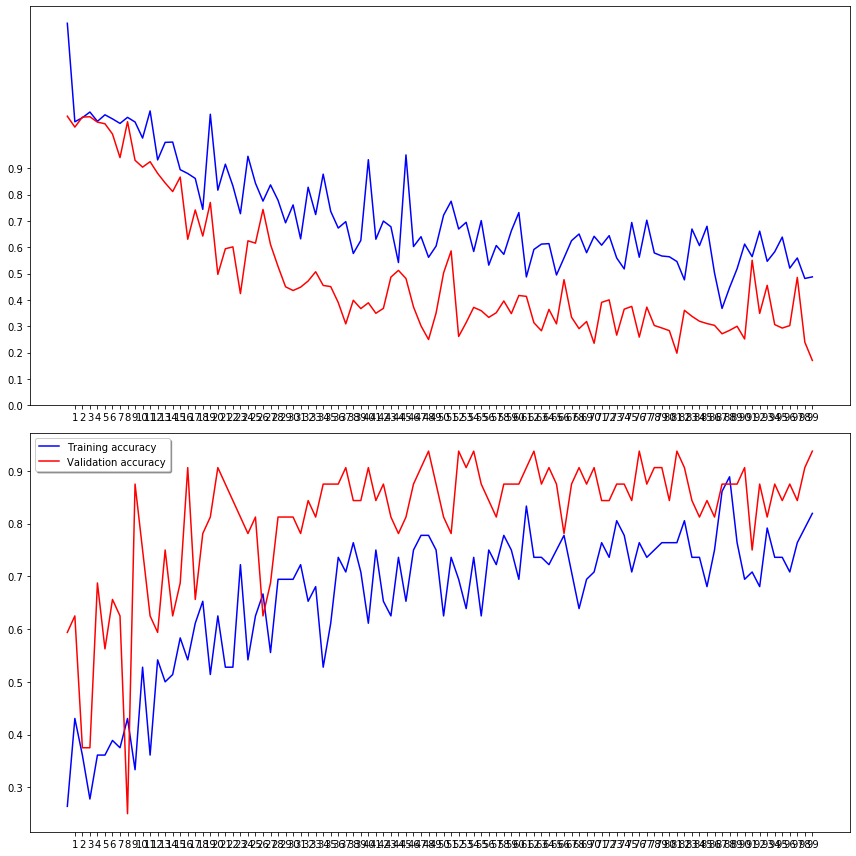

In [15]:
#Virtualize Training
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epoch, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epoch, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

In [16]:
#lets evaluate our model
model.evaluate(validation_generator)

2/2 [==============================] - 0s 41ms/step - loss: 0.4072 - accuracy: 0.8167


[0.4072321057319641, 0.8166666626930237]

In [17]:
# As we can see that there are 3 classes for the 60 test images
validation_generator.classes


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Predicting the Test images


In [18]:
pred = model.predict(validation_generator)

y_classes = pred.argmax(axis=-1)
print(y_classes)
res = pd.DataFrame()
res['ImageId'] = list(range(1,61))
res['Predicted_Label'] = y_classes
res['Actual_Label']=validation_generator.classes
res.head(50)
#res.to_csv("output.csv", index = False)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 1 1 2 1 1 2 2 1
 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 1 2 2 2 1]


,ImageId,Predicted_Label,Actual_Label
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,0,0
5,6,0,0
6,7,0,0
7,8,0,0
8,9,0,0
9,10,0,0


## Confution Matrix and Classification Report


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}


Y_pred = model.predict(validation_generator, nb_validation_samples)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))
print('Classification Report')
target_names = list(class_labels.values())
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Confusion Matrix
[[20  0  0]
 [ 0 14  6]
 [ 0  5 15]]
Classification Report
              precision    recall  f1-score   support

       Saree       1.00      1.00      1.00        20
     Tshirts       0.74      0.70      0.72        20
      shirts       0.71      0.75      0.73        20

    accuracy                           0.82        60
   macro avg       0.82      0.82      0.82        60
weighted avg       0.82      0.82      0.82        60



In [20]:
#Lets load our model
from keras.models import load_model

saved_model = load_model('best_model.h5')

### Testing our  classifier

Input Image is: Saree_img_231.jpeg


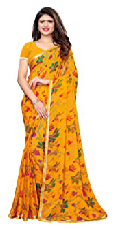

Predicted Label is: [0] 

Input Image is: Saree_img_232.jpeg


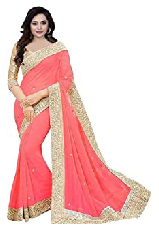

Predicted Label is: [0] 

Input Image is: Saree_img_233.jpeg


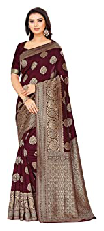

Predicted Label is: [0] 

Input Image is: Saree_img_234.jpeg


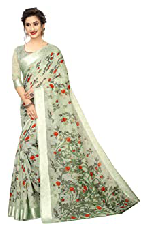

Predicted Label is: [0] 

Input Image is: Saree_img_236.jpeg


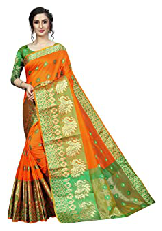

Predicted Label is: [0] 

Input Image is: Saree_img_237.jpeg


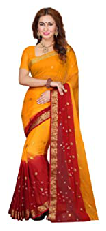

Predicted Label is: [0] 

Input Image is: Saree_img_239.jpeg


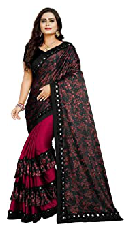

Predicted Label is: [0] 

Input Image is: Saree_img_242.jpeg


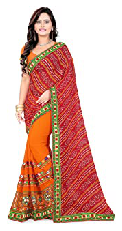

Predicted Label is: [0] 

Input Image is: Saree_img_243.jpeg


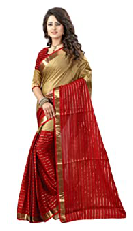

Predicted Label is: [0] 

Input Image is: Saree_img_244.jpeg


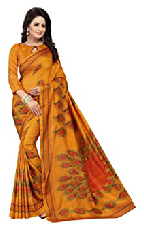

Predicted Label is: [0] 

Input Image is: Saree_img_245.jpeg


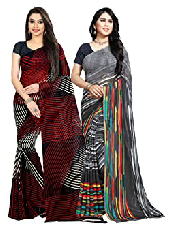

Predicted Label is: [0] 

Input Image is: Saree_img_311.jpeg


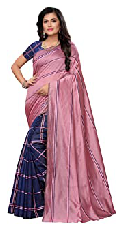

Predicted Label is: [0] 

Input Image is: Saree_img_312.jpeg


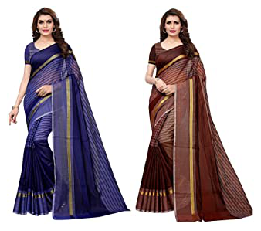

Predicted Label is: [0] 

Input Image is: Saree_img_313.jpeg


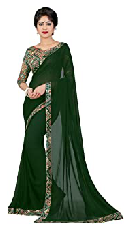

Predicted Label is: [0] 

Input Image is: Saree_img_314.jpeg


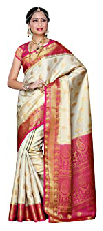

Predicted Label is: [0] 

Input Image is: Saree_img_315.jpeg


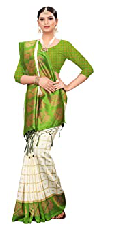

Predicted Label is: [0] 

Input Image is: Saree_img_316.jpeg


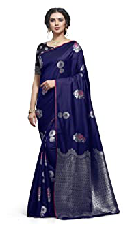

Predicted Label is: [0] 

Input Image is: Saree_img_317.jpeg


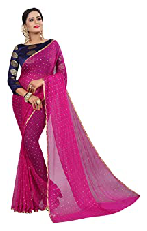

Predicted Label is: [0] 

Input Image is: Saree_img_319.jpeg


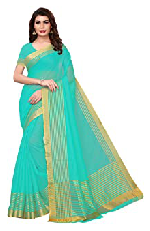

Predicted Label is: [0] 

Input Image is: Saree_img_332.jpeg


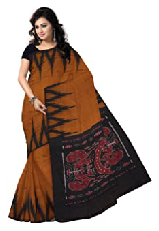

Predicted Label is: [0] 

Input Image is: Shirt_img_229.jpeg


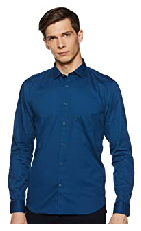

Predicted Label is: [1] 

Input Image is: Shirt_img_230.jpeg


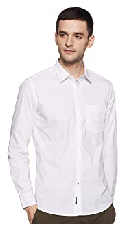

Predicted Label is: [2] 

Input Image is: Shirt_img_231.jpeg


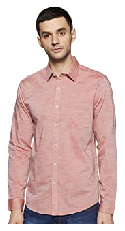

Predicted Label is: [2] 

Input Image is: Shirt_img_233.jpeg


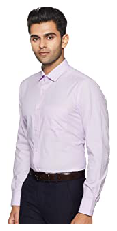

Predicted Label is: [2] 

Input Image is: Shirt_img_236.jpeg


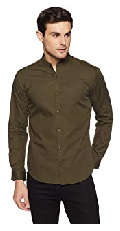

Predicted Label is: [2] 

Input Image is: Shirt_img_240.jpeg


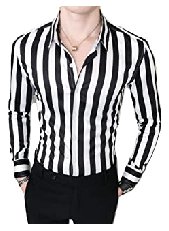

Predicted Label is: [1] 

Input Image is: Shirt_img_245.jpeg


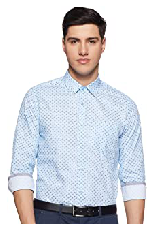

Predicted Label is: [2] 

Input Image is: Shirt_img_247.jpeg


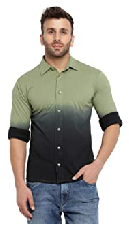

Predicted Label is: [1] 

Input Image is: Shirt_img_248.jpeg


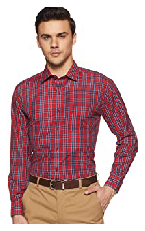

Predicted Label is: [2] 

Input Image is: Shirt_img_249.jpeg


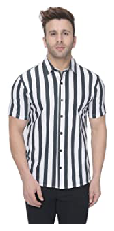

Predicted Label is: [1] 

Input Image is: Shirt_img_250.jpeg


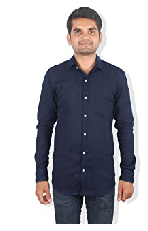

Predicted Label is: [1] 

Input Image is: Shirt_img_251.jpeg


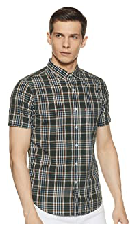

Predicted Label is: [2] 

Input Image is: Shirt_img_253.jpeg


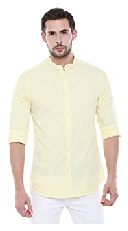

Predicted Label is: [2] 

Input Image is: Shirt_img_256.jpeg


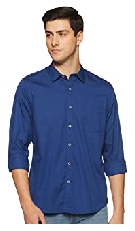

Predicted Label is: [2] 

Input Image is: Shirt_img_259.jpeg


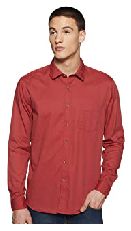

Predicted Label is: [2] 

Input Image is: Shirt_img_311.jpeg


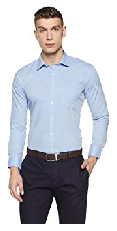

Predicted Label is: [2] 

Input Image is: Shirt_img_312.jpeg


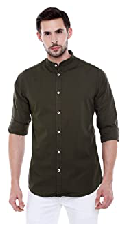

Predicted Label is: [1] 

Input Image is: Shirt_img_317.jpeg


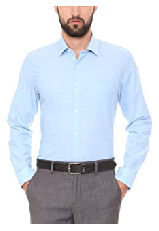

Predicted Label is: [2] 

Input Image is: Shirt_img_320.jpeg


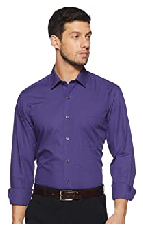

Predicted Label is: [2] 

Input Image is: Shirt_img_327.jpeg


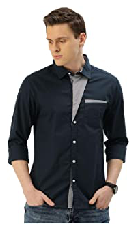

Predicted Label is: [1] 

Input Image is: Tshirt_img_154.jpeg


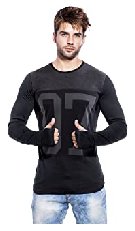

Predicted Label is: [1] 

Input Image is: Tshirt_img_223.jpeg


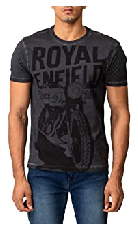

Predicted Label is: [1] 

Input Image is: Tshirt_img_231.jpeg


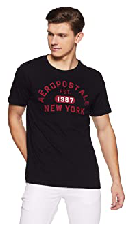

Predicted Label is: [1] 

Input Image is: Tshirt_img_232.jpeg


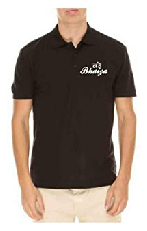

Predicted Label is: [1] 

Input Image is: Tshirt_img_233.jpeg


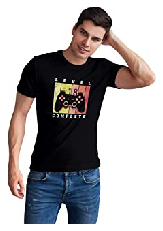

Predicted Label is: [1] 

Input Image is: Tshirt_img_234.jpeg


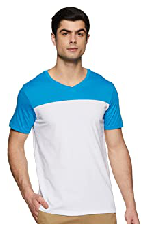

Predicted Label is: [1] 

Input Image is: Tshirt_img_236.jpeg


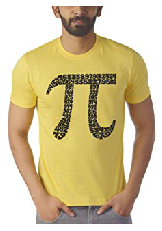

Predicted Label is: [0] 

Input Image is: Tshirt_img_238.jpeg


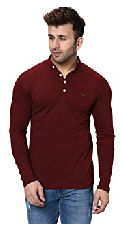

Predicted Label is: [2] 

Input Image is: Tshirt_img_239.jpeg


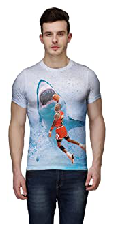

Predicted Label is: [1] 

Input Image is: Tshirt_img_250.jpeg


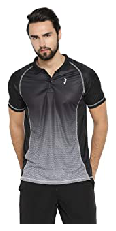

Predicted Label is: [1] 

Input Image is: Tshirt_img_254.jpeg


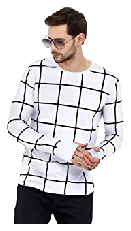

Predicted Label is: [1] 

Input Image is: Tshirt_img_325.jpeg


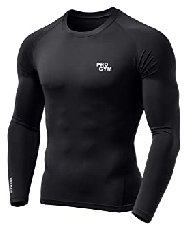

Predicted Label is: [2] 

Input Image is: Tshirt_img_326.jpeg


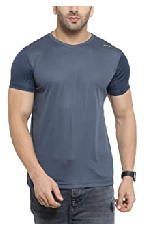

Predicted Label is: [1] 

Input Image is: Tshirt_img_327.jpeg


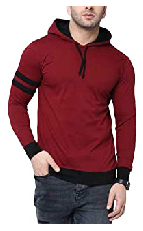

Predicted Label is: [1] 

Input Image is: Tshirt_img_331.jpeg


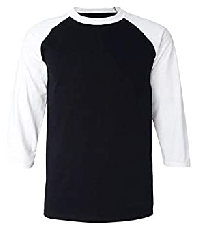

Predicted Label is: [2] 

Input Image is: Tshirt_img_333.jpeg


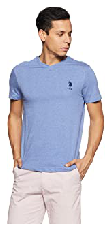

Predicted Label is: [2] 

Input Image is: Tshirt_img_347.jpeg


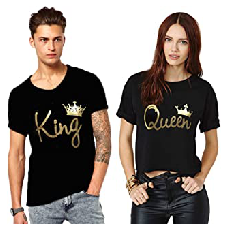

Predicted Label is: [1] 

Input Image is: Tshirt_img_357.jpeg


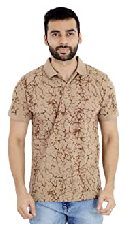

Predicted Label is: [2] 

Input Image is: Tshirt_img_358.jpeg


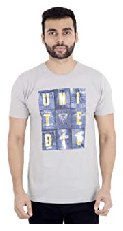

Predicted Label is: [2] 

Input Image is: Tshirt_img_359.jpeg


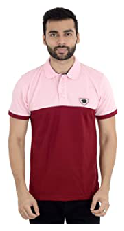

Predicted Label is: [1] 



In [21]:

test_dire=[saree_dir_test,shirt_dir_test,t_shirt_dir_test]

for test_dir in test_dire:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(128, 128))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = saved_model.predict(test_image)
        print("Predicted Label is:",np.argmax(result, axis=1),"\n")

## Lets predict all the images of test dataset using openCV

In [22]:
from keras.preprocessing import image
from os.path import isfile, join
import re

def draw_test(name, pred, im, true_label):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(im, 160, 0, 0, 500 ,cv2.BORDER_CONSTANT,value=BLACK)
    cv2.putText(expanded_image, "predited - "+ pred, (128, 128) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,0,255), 2)
    cv2.putText(expanded_image, "true - "+ true_label, (128, 128) , cv2.FONT_HERSHEY_SIMPLEX,1, (0,255,0), 2)
    cv2.imshow(name, expanded_image)


def getRandomImage(path, img_width, img_height):
    """function loads a random images from a random folder in our test path """
    folders = list(filter(lambda x: os.path.isdir(os.path.join(path, x)), os.listdir(path)))
    random_directory = np.random.randint(0,len(folders))
    path_class = folders[random_directory]
    file_path = path + path_class
    file_names = [f for f in listdir(file_path) if isfile(join(file_path, f))]
    random_file_index = np.random.randint(0,len(file_names))
    image_name = file_names[random_file_index]
    final_path = file_path + "/" + image_name
    return image.load_img(final_path, target_size = (img_width, img_height)), final_path, path_class

# dimensions of our images
img_width, img_height = 128, 128


files = []
predictions = []
true_labels = []
# predicting images
for i in range(0, 10):
    path = './ama-clothes/test/'
    img, final_path, true_label = getRandomImage(path, img_width, img_height)
    files.append(final_path)
    true_labels.append(true_label)
    x = image.img_to_array(img)
    x = x * 1./255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    classes = model.predict_classes(images, batch_size = 12)
    predictions.append(classes)
    
for i in range(0, len(files)):
    image = cv2.imread((files[i]))
    draw_test("Prediction", class_labels[predictions[i][0]], image, true_labels[i])
    cv2.waitKey(0)

cv2.destroyAllWindows()

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
